In [7]:
from account_book import AccountBook

FILEPATH = "MoneyTracking.xlsx"
account_book = AccountBook(FILEPATH)

In [8]:
def get_sheets(currency_name):
    income = account_book.income.loc[account_book.income["currency"]==currency_name]
    outcome = account_book.spending.loc[account_book.spending["currency"]==currency_name]
    transfer_from = account_book.transfer_from.loc[account_book.transfer_from["currency"]==currency_name]
    transfer_to = account_book.transfer_to.loc[account_book.transfer_to["currency"]==currency_name]
    return {"income": income, "outcome": outcome, "transfer_from": transfer_from, "transfer_to": transfer_to}

# Get USD only
us = get_sheets("USD")

In [9]:
def get_balance(currency, account):
    sheets = get_sheets(currency)
    money_in = (
        currency["income"].loc[currency["income"]["account"] == account]["amount"].sum() +
        currency["transfer_to"].loc[currency["transfer_to"]["account"] == account]["amount"].sum()
    )
    money_out = (
        currency["outcome"].loc[currency["outcome"]["account"] == account]["amount"].sum() +
        currency["transfer_from"].loc[currency["transfer_from"]["account"] == account]["amount"].sum()
    )
    return float(money_in - money_out)

print("===============================================================")
print("MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT")
print("===============================================================")
print("Saving: {:.2f}".format(get_balance(us, "Saving")))
print("Checking: {:.2f}".format(get_balance(us, "Checking")))
print("Cash: {:.2f}".format(get_balance(us, "Cash")))
print("Credit Card: {:.2f}".format(get_balance(us, "Credit Card")))

MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT
Saving: 20040.63
Checking: 2242.50
Cash: 53.00
Credit Card: 53.13


In [10]:
# pet = us["outcome"]
# pet.loc[pet.category == "Pet"] 

In [11]:
# evelyn_credit_card = us["outcome"].loc[us["outcome"]["account"] == "Credit Card - Evelyn"]
# print("Credit Card (Evelyn): {:.2f}".format(-evelyn_credit_card["amount"].sum()))

2020 Groceries overview
detail
h mart                    740.21
target                    541.57
costco                    536.75
trader joe's              504.84
99 ranch                  459.03
sprouts                   338.37
amazon, whole foods       206.99
wholefood                  41.87
mitsuwa                    26.94
trarget                    23.60
168 market                 23.11
sheng kee barkey           22.19
pb hostetter paris bag     18.39
paris bague                16.38
clover bakery cafe          8.25
amazon                      7.25
the market at north pa      6.24
tous les jours              5.50
Name: amount, dtype: float64


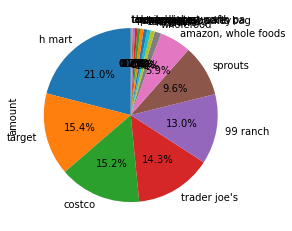

In [13]:
print("2020 Groceries overview")
start_date, end_date= "20200601", "20201231"
groceries = get_spending_category_insight(us, "Groceries", start_date, end_date)
print(groceries)
draw_spending_pie_chart(groceries)

In [12]:
def get_spending_df(currency, start_date, end_date):
    return currency["outcome"].loc[(currency["outcome"]["date"] >= start_date) & (currency["outcome"]["date"] <= end_date)]

def get_spending(currency, start_date, end_date):
    return get_spending_df(currency, start_date, end_date).groupby("category").sum()["amount"].sort_values(ascending=False)

def draw_spending_pie_chart(spending):
    spending.plot.pie(y="amount", startangle=90, autopct='%1.1f%%')
    
def get_spending_category_insight(currency, category, start_date, end_date):
    df = get_spending_df(us, start_date, end_date)
    df = df.loc[df.category == category]
    return df.groupby(df.detail.str.lower()).sum()["amount"].sort_values(ascending=False)

In [17]:
start_date, end_date= "20201101", "20201130"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.11 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

2020.11 Spending: 932.31
category
Cash,Check & Misc           410.00
Shopping & Entertainment    218.48
Home & Utilities            190.33
Groceries                   113.50
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
target                 48.75
amazon, whole foods    42.59
99 ranch               22.16
Name: amount, dtype: float64


In [16]:
start_date, end_date= "20201001", "20201031"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.10 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

2020.10 Spending: 5908.55
category
Home & Utilities            4686.36
Groceries                    667.28
Pet                          236.00
Cash,Check & Misc            132.57
Restaurants & Dining         101.01
Shopping & Entertainment      64.41
Transportation                20.92
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
amazon, whole foods    164.40
costco                 140.54
trader joe's           104.48
h mart                  97.63
target                  88.48
99 ranch                64.50
amazon                   7.25
Name: amount, dtype: float64


In [8]:
start_date, end_date= "20200901", "20200930"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.09 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Remove tuition")
print("******************")
spneding_2020_09 = get_spending_df(us, start_date, end_date)
spending_2020_09_remove_tuition = spneding_2020_09[spneding_2020_09.detail != "CMU Tuition"].groupby("category").sum()["amount"].sort_values(ascending=False)
print(spending_2020_09_remove_tuition)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

print("******************")
print("Sub - Home & Utilities")
print("******************")
print(get_spending_category_insight(us, "Home & Utilities", start_date, end_date))

print("******************")
print("Sub - Cash,Check & Misc")
print("******************")
print(get_spending_category_insight(us, "Cash,Check & Misc", start_date, end_date))

2020.09 Spending: 37997.91
category
Cash,Check & Misc           31587.87
Home & Utilities             5314.28
Groceries                     824.85
Pet                           122.86
Restaurants & Dining           82.45
Shopping & Entertainment       33.70
Transportation                 31.90
Name: amount, dtype: float64
******************
Remove tuition
******************
category
Home & Utilities            5314.28
Cash,Check & Misc           3502.87
Groceries                    824.85
Pet                          122.86
Restaurants & Dining          82.45
Shopping & Entertainment      33.70
Transportation                31.90
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
h mart                265.33
99 ranch              176.90
costco                147.10
trader joe's          123.01
target                 87.88
paris bague            16.38
clover bakery cafe      8.25
Name: amount, dtype: float64
******************
Sub - Home & Utilitie

In [10]:
start_date, end_date= "20200801", "20200831"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.08 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

2020.08 Spending: 5296.25
category
Home & Utilities            3196.61
Pet                          596.15
Groceries                    595.74
Shopping & Entertainment     340.62
Restaurants & Dining         300.60
Cash,Check & Misc            208.88
Transportation                57.65
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
h mart              146.74
costco              139.51
trader joe's        134.18
target               63.75
sprouts              63.44
99 ranch             36.93
sheng kee barkey     11.19
Name: amount, dtype: float64


In [9]:
food = get_spending_df(us, start_date, end_date)
food = food.loc[food.category == "Restaurants & Dining"]
food

,date,currency,bank,account,amount,category,detail,note,credit_card,Unnamed: 9
100,2020-08-01,USD,Bank of America,Credit Card,35.59,Restaurants & Dining,Boiling Point,NaN,Bank of America Cash Rewards World Master Card...,NaN
107,2020-08-04,USD,Bank of America,Credit Card,37.44,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,NaN
110,2020-08-07,USD,Bank of America,Credit Card,43.87,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,"me, Evelyn and Mendy"
111,2020-08-07,USD,Bank of America,Credit Card,31.43,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,NaN
113,2020-08-08,USD,Bank of America,Credit Card,22.30,Restaurants & Dining,Tea Spoon,NaN,Bank of America Cash Rewards World Master Card...,NaN
116,2020-08-09,USD,Bank of America,Credit Card,45.10,Restaurants & Dining,Boiling Point,NaN,Bank of America Cash Rewards World Master Card...,Doordash
134,2020-08-18,USD,Bank of America,Credit Card,2.00,Restaurants & Dining,Vending machine,NaN,NaN,NaN
139,2020-08-20,USD,Bank of America,Checking,2.40,Restaurants & Dining,Starbucks,NaN,NaN,Venmo to Jaspher
146,2020-08-22,USD,Bank of America,Credit Card,74.62,Restaurants & Dining,Easterly,NaN,Bank of America Cash Rewards World Master Card...,with Mendy and Ben


2020.07 Spending: 13928.87
category
Cash,Check & Misc           10043.87
Home & Utilities             2328.43
Groceries                     723.56
Pet                           510.32
Restaurants & Dining          213.92
Transportation                 93.78
Shopping & Entertainment       14.99
Name: amount, dtype: float64
******************
Remove tuition
******************
category
Home & Utilities            2328.43
Groceries                    723.56
Pet                          510.32
Restaurants & Dining         213.92
Transportation                93.78
Cash,Check & Misc             43.87
Shopping & Entertainment      14.99
Name: amount, dtype: float64


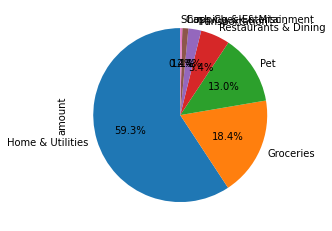

In [10]:
start_date, end_date= "20200701", "20200731"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.07 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Remove tuition")
print("******************")
spneding_2020_07 = get_spending_df(us, start_date, end_date)
spending_2020_07_remove_tuition = spneding_2020_07[spneding_2020_07.detail != "SJSU Tuition"].groupby("category").sum()["amount"].sort_values(ascending=False)
print(spending_2020_07_remove_tuition)

draw_spending_pie_chart(spending_2020_07_remove_tuition)

In [11]:
start_date, end_date= "20200601", "20200630"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.06 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

2020.06 Spending: 2965.86
category
Home & Utilities            1974.48
Groceries                    602.55
Restaurants & Dining         352.09
Transportation                21.75
Shopping & Entertainment      14.99
Name: amount, dtype: float64
